In [27]:
from IPython.display import *
import pandas as pd, numpy as np, plotly.express as px
from IPython.display import *
import json, os, re, requests, nltk
from wordcloud import *
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
stopwords = STOPWORDS.union(set(nltk.corpus.stopwords.words("english")))
def character_count(chapters, characters, so_far = True):
    counts = {name : np.char.count(chapters, name) for name in characters}
    mentions = pd.DataFrame(counts)
    if so_far:
        mentions = mentions.cumsum()
    labels = {"variable":"Character", "index":"Chapter", "value": "Times Mentioned"}
    return px.line(mentions, labels=labels, template="seaborn")

def make_wordcloud(text, mask, color):
    if mask:
        mask_img = np.array(Image.open(mask))
    else:
        mask_img = None
    wc = WordCloud(background_color="white", max_words=3000, stopwords=stopwords, 
              contour_width = 1, min_font_size=1, width = 2000, height = 1200,
              contour_color = color,mask=mask_img, scale = 2)
    wc.generate(text);
    plt.imshow(wc, interpolation='bilinear');
    plt.axis("off");
    plt.show();
    if mask:
        display(Image.open(mask))
HTML("literacy.html")

In [2]:
HTML("intro.html")

In [3]:
HTML("childhood.html")

# Metamorphoses Analysis

In the code below, I am retrieving the text of _Metamorphoses: Book VIII_ from the MIT Classics Department and saving it as text, and then excluding any author information; I just want the text of the book.

Below we make a wordcloud of the most common words in the text!

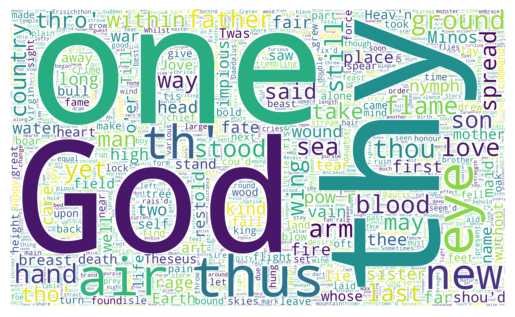

In [19]:
ovid_url = "http://classics.mit.edu/Ovid/metam.mb.txt"
ovid_text = (requests.get(ovid_url)
       .text.split('BOOK THE EIGHTH')[1]
       .split('BOOK THE NINTH')[0])
make_wordcloud(ovid_text, mask=None, color="white")

In [21]:
HTML("adolescence.html")

# Gatsby Analysis

In the code below, I am retreiving the text of _The Great Gatsby_ from the Gutenburg Project, Australia, and saving it as text, and then excluding any author information; I just want the text of the book.

I also output a random part of the book so you can see what it looks like

In [7]:
gatsby_url = "https://gutenberg.net.au/ebooks02/0200041.txt"
gatsby_text = requests.get(gatsby_url).text[1276:-35].replace("\'s", "").replace("\'", "")
gatsby_start = np.random.randint(0, high = 20e4)
print(gatsby_text[gatsby_start:gatsby_start + 500].strip())

r
to the moon. Now it was again a green light on a dock. His count of
enchanted objects had diminished by one.

I began to walk about the room, examining various indefinite objects in
the half darkness. A large photograph of an elderly man in yachting
costume attracted me, hung on the wall over his desk.

"Who this?"

"That? That Mr. Dan Cody, old sport."

The name sounded faintly familiar.

"He dead now. He used to be my best friend years ago."

There was a small picture of Gatsby, also in yach


Below, we can make another wordcloud of common words, this time in the shape of Gatsby's famous martini glass

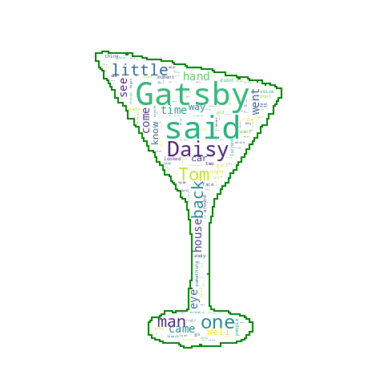

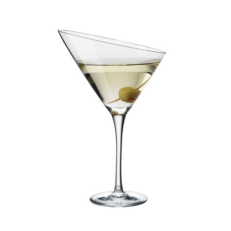

In [8]:
make_wordcloud(gatsby_text, "martini.png", "green")

Here we can look at the amount of times that each character was mentioned!

In [9]:
gatsby_chapters = gatsby_text.split("Chapter")[1:]
gatsby_characters = ["Nick", "Gatsby", "Daisy", "Tom", "Jordan"]
character_count(chapters = gatsby_chapters, characters = gatsby_characters)

In [10]:
HTML("adult.html")

# Odyssey Analysis

In the code below, I am retrieving the text of _The Odyssey_ from the MIT Classics Department and saving it as text, and then excluding any author information; I just want the text of the book.

I also output a random part of the book so you can see what it looks like

In [11]:
odyssey_url = "http://classics.mit.edu/Homer/odyssey.mb.txt"
odyssey_text = requests.get(odyssey_url).text[262:-559]
odyssey_start = np.random.randint(0, high = 60e4)
print(odyssey_text[odyssey_start:odyssey_start + 500].strip())

every one) the storm winds came and
spirited them away to become handmaids to the dread Erinyes. Even
so I wish that the gods who live in heaven would hide me from mortal
sight, or that fair Diana might strike me, for I would fain go even
beneath the sad earth if I might do so still looking towards Ulysses
only, and without having to yield myself to a worse man than he was.
Besides, no matter how much people may grieve by day, they can put
up with it so long as they can sleep at night, for when


Let's make another wordcloud, but this time of Odyssey!

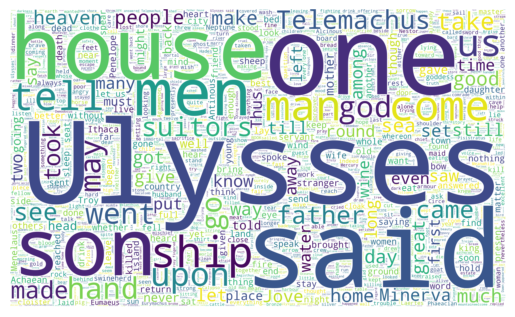

In [20]:
make_wordcloud(odyssey_text, None, "white")

Here we can look at the amount of times that each character was mentioned!

In [12]:
odyssey_chapters = odyssey_text.split("BOOK")[1:]
odyssey_characters = ["Ulysses", "Telemachus", "Penelope", "Minerva", 
                      "Calypso", "Circe", "Neptune", "Saturn", "Helen"]
character_count(chapters = odyssey_chapters, characters = odyssey_characters)

In [13]:
HTML("present.html")

In [14]:
HTML("references.html")